# Homework 11

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [2]:
#Q1
data = sns.load_dataset('diamonds')

In [3]:
#Q2
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#Q3
data = data.drop(columns=['x', 'y', 'z'])

In [5]:
#Q4
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 1.8 MB


In [8]:
#Q5
dum = pd.get_dummies(data, columns=['cut','color','clarity'])
dum = dum.drop(columns=['carat','depth','table','price'])
dum

,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
53936,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
53937,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
53938,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [9]:
#Q6
categorical_columns = ['cut', 'color', 'clarity']
data = data.drop(columns=categorical_columns)
dataDummies = pd.concat([data, dum], axis=1)
dataDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  bool   
 5   cut_Premium    53940 non-null  bool   
 6   cut_Very Good  53940 non-null  bool   
 7   cut_Good       53940 non-null  bool   
 8   cut_Fair       53940 non-null  bool   
 9   color_D        53940 non-null  bool   
 10  color_E        53940 non-null  bool   
 11  color_F        53940 non-null  bool   
 12  color_G        53940 non-null  bool   
 13  color_H        53940 non-null  bool   
 14  color_I        53940 non-null  bool   
 15  color_J        53940 non-null  bool   
 16  clarity_IF     53940 non-null  bool   
 17  clarity_VVS1   53940 non-null  bool   
 18  clarit

In [10]:
#Q7
numeric_columns = ['carat', 'depth', 'table', 'price']
scaler = StandardScaler()
dataDummies[numeric_columns] = scaler.fit_transform(dataDummies[numeric_columns])

In [11]:
dataDummies

,carat,depth,table,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,-1.198168,-0.174092,-1.099672,-0.904095,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-1.240361,-1.360738,1.585529,-0.904095,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.198168,-3.385019,3.375663,-0.903844,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-1.071587,0.454133,0.242928,-0.902090,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,-1.029394,1.082358,0.242928,-0.901839,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,-0.294731,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
53936,-0.164427,0.942753,-1.099672,-0.294731,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
53937,-0.206621,0.733344,1.137995,-0.294731,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
53938,0.130927,-0.523105,0.242928,-0.294731,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
#Q8
correlation_data = dataDummies.corr()
correlation_data['price']

carat            0.921591
depth           -0.010647
table            0.127134
price            1.000000
cut_Ideal       -0.097175
cut_Premium      0.095706
cut_Very Good    0.006593
cut_Good        -0.000312
cut_Fair         0.018728
color_D         -0.072473
color_E         -0.101089
color_F         -0.024161
color_G          0.008556
color_H          0.059223
color_I          0.097125
color_J          0.081710
clarity_IF      -0.049596
clarity_VVS1    -0.095266
clarity_VVS2    -0.052381
clarity_VS1     -0.009886
clarity_VS2     -0.001062
clarity_SI1      0.008957
clarity_SI2      0.128420
clarity_I1      -0.000255
Name: price, dtype: float64

In [13]:
#Q9
selected_columns = correlation_data['price'].abs().nlargest(6).index
X = dataDummies[selected_columns].drop('price', axis=1)
y = dataDummies['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
#Q10
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#Q11
test_score = model.score(X_test, y_test)
test_score

0.8679724449509858

In [17]:
#Q12
train_score = model.score(X_train, y_train)
train_score

0.8677215780651998

In [18]:
#Q13
predictions = model.predict(X_test)

In [19]:
#Q14
pred_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predictions})
pred_df.head()

,Actual Price,Predicted Price
1388,-0.845690,-1.041884
50052,-0.434100,-0.433073
41645,-0.675490,-0.616885
42377,-0.658946,-0.650075
17244,0.744021,1.404599


In [21]:
#Q15
pred_df['Residuals'] = pred_df['Actual Price'] - pred_df['Predicted Price']
pred_df.head()

,Actual Price,Predicted Price,Residuals
1388,-0.845690,-1.041884,0.196193
50052,-0.434100,-0.433073,-0.001027
41645,-0.675490,-0.616885,-0.058604
42377,-0.658946,-0.650075,-0.008871
17244,0.744021,1.404599,-0.660578


<Axes: xlabel='Residuals', ylabel='Density'>

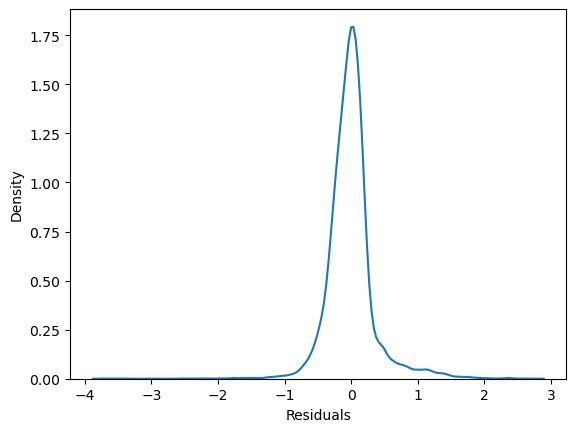

In [23]:
#Q16
sns.kdeplot(pred_df['Residuals'])

In [26]:
#Q17
from sklearn.feature_selection import RFE

# Initialize the linear regression model
model = LinearRegression()

# Create empty lists to store results
num_features_list = []
test_scores = []
train_scores = []

# Define the range of features to test
for num_features in range(1, len(X.columns) + 1):
    # Create RFE model with the linear regression estimator
    rfe = RFE(model, n_features_to_select=num_features)
    
    # Fit the RFE model and transform the data
    X_rfe = rfe.fit_transform(X_train, y_train)
    
    # Train/test split on the selected features
    X_test_rfe = rfe.transform(X_test)
    
    # Fit a model on the selected features
    model.fit(X_rfe, y_train)
    
    # Append the number of features and corresponding scores
    num_features_list.append(num_features)
    test_scores.append(model.score(X_test_rfe, y_test))
    train_scores.append(model.score(X_rfe, y_train))


<Axes: xlabel='Number of Features', ylabel='Score'>

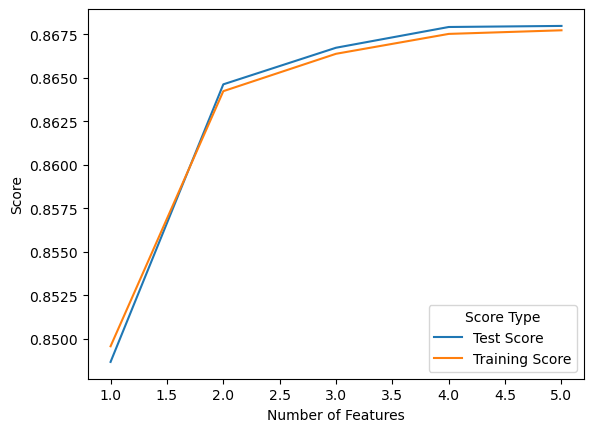

In [29]:
#Q18
scores_df = pd.DataFrame({
    'Number of Features': num_features_list,
    'Test Score': test_scores,
    'Training Score': train_scores
})
scores_df_melted = scores_df.melt('Number of Features', var_name='Score Type', value_name='Score')
sns.lineplot(x='Number of Features', y='Score', hue='Score Type', data=scores_df_melted)

NameError: name 'iris' is not defined